In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\"

In [14]:
load_folder = 'C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\'
peakLoad = pd.read_excel(load_folder + 'Peakload.xlsx')
load = pd.read_excel(load_folder + 'load.xlsx')
load = load.sort_values(by=['building id'])
load = load.reset_index()
load = load.drop(['index'], axis=1)
peakLoad['Load'] = load['Load']
peakLoad['Load Factor'] = peakLoad['Load']/(peakLoad['Peak Load']*8760)
peakLoad = peakLoad.drop(['Unnamed: 0'], axis=1)

peakLoad['MgSO4 Salt Mass E'] = peakLoad['Peak Load']/0.75
peakLoad['MgSO4 Salt Mass P'] = peakLoad['Peak Load']/0.281267306
peakLoad['MgSO4 Salt Mass'] = peakLoad[['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E'], axis=1)

peakLoad['MgCl2 Salt Mass E'] = peakLoad['Peak Load']/0.193056
peakLoad['MgCl2 Salt Mass P'] = peakLoad['Peak Load']/0.084767892
peakLoad['MgCl2 Salt Mass'] = peakLoad[['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E'], axis=1)

peakLoad['K2CO3 Salt Mass E'] = peakLoad['Peak Load']/0.186111
peakLoad['K2CO3 Salt Mass P'] = peakLoad['Peak Load']/1.646738256
peakLoad['K2CO3 Salt Mass'] = peakLoad[['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E'], axis=1)

peakLoad['SrBr2 Salt Mass E'] = peakLoad['Peak Load']/0.3556
peakLoad['SrBr2 Salt Mass P'] = peakLoad['Peak Load']/0.811253581
peakLoad['SrBr2 Salt Mass'] = peakLoad[['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E'], axis=1)

peakLoad

,building id,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass
0,1,27.724174,58015.584978,0.238881,98.568777,327.059854,148.965802,77.964495
1,2,20.164945,41411.346548,0.234433,71.693170,237.884232,108.349022,56.706819
2,3,18.771555,36953.435376,0.224725,66.739200,221.446522,100.862146,52.788400
3,4,16.617412,31673.736508,0.217586,59.080496,196.034272,89.287640,46.730630
4,5,27.902137,59150.390389,0.242000,99.201496,329.159269,149.922022,78.464953
...,...,...,...,...,...,...,...,...
395,396,12.189566,23415.204886,0.219283,43.338012,143.799328,65.496214,34.278869
396,397,12.662940,24918.728631,0.224640,45.021018,149.383689,68.039720,35.610069
397,398,4.833286,7854.976581,0.185523,17.183958,57.017881,25.969908,13.591917
398,399,14.577960,28841.437895,0.225848,51.829559,171.975025,78.329386,40.995389


In [15]:
rate = 'Fixed_Rate'
size = 'Fixed_Size'

In [16]:
# Total costs:
cost_noTES = pd.read_excel(ResultsFolder + 'costs_noTES_' + rate +'.xlsx')
cost_MgSO4 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_MgSO4'+'.xlsx')
cost_MgCl2 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_MgCl2'+'.xlsx')
#cost_K2CO3 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_K2CO3'+'.xlsx')
cost_SrBr2 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_SrBr2'+'.xlsx')

# Clean up:
cost_noTES = cost_noTES.rename(columns={'Unnamed: 0': 'building id'})
cost_noTES = cost_noTES.sort_values(by=['building id'])
cost_noTES = cost_noTES.reset_index()
cost_noTES = cost_noTES[['building id', 'total cost ($)']]

cost_MgSO4 = cost_MgSO4.rename(columns={'Unnamed: 0': 'building id'})
cost_MgSO4 = cost_MgSO4.sort_values(by=['building id'])
cost_MgSO4 = cost_MgSO4.reset_index()
cost_MgSO4 = cost_MgSO4[['building id', 'total cost ($)']]

cost_MgCl2 = cost_MgCl2.rename(columns={'Unnamed: 0': 'building id'})
cost_MgCl2 = cost_MgCl2.sort_values(by=['building id'])
cost_MgCl2 = cost_MgCl2.reset_index()
cost_MgCl2 = cost_MgCl2[['building id', 'total cost ($)']]

#cost_K2CO3 = cost_K2CO3.rename(columns={'Unnamed: 0': 'building id'})
#cost_K2CO3 = cost_K2CO3.sort_values(by=['building id'])
#cost_K2CO3 = cost_K2CO3.reset_index()
#cost_K2CO3 = cost_K2CO3[['building id', 'total cost ($)']]

cost_SrBr2 = cost_SrBr2.rename(columns={'Unnamed: 0': 'building id'})
cost_SrBr2 = cost_SrBr2.sort_values(by=['building id'])
cost_SrBr2 = cost_SrBr2.reset_index()
cost_SrBr2 = cost_SrBr2[['building id', 'total cost ($)']]

# Find changes in total costs:
cost_impacts_TES = pd.DataFrame()
cost_impacts_TES['building id'] = cost_noTES['building id']
cost_impacts_TES['total cost - no TES'] = cost_noTES['total cost ($)']
cost_impacts_TES['total cost - MgSO4'] = cost_MgSO4['total cost ($)']
cost_impacts_TES['total cost - MgCl2'] = cost_MgCl2['total cost ($)']
#cost_impacts_TES['total cost - K2CO3'] = cost_K2CO3['total cost ($)']
cost_impacts_TES['total cost - SrBr2'] = cost_SrBr2['total cost ($)']

cost_impacts_TES['cost saving - MgSO4'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - MgSO4']
cost_impacts_TES['cost saving % - MgSO4'] = cost_impacts_TES['cost saving - MgSO4']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - MgCl2'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - MgCl2']
cost_impacts_TES['cost saving % - MgCl2'] = cost_impacts_TES['cost saving - MgCl2']/cost_impacts_TES['total cost - no TES']
#cost_impacts_TES['cost saving - K2CO3'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - K2CO3']
#cost_impacts_TES['cost saving % - K2CO3'] = cost_impacts_TES['cost saving - K2CO3']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - SrBr2'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - SrBr2']
cost_impacts_TES['cost saving % - SrBr2'] = cost_impacts_TES['cost saving - SrBr2']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES
#cost_impacts_TES.to_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\cost_saving.xlsx")

,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,cost saving % - MgCl2,cost saving - SrBr2,cost saving % - SrBr2
0,1,3526.290877,3372.915604,3474.185769,3423.185075,153.375273,0.043495,52.105108,0.014776,103.105803,0.029239
1,2,2523.385394,2390.384136,2473.059192,2430.539830,133.001258,0.052707,50.326202,0.019944,92.845564,0.036794
2,3,2254.533101,2122.435409,2203.332290,2160.849991,132.097692,0.058592,51.200811,0.022710,93.683110,0.041553
3,4,1938.359969,1816.609952,1888.304285,1850.468688,121.750017,0.062811,50.055684,0.025824,87.891281,0.045343
4,5,3591.834993,3437.057640,3540.125834,3488.534015,154.777353,0.043091,51.709159,0.014396,103.300977,0.028760
...,...,...,...,...,...,...,...,...,...,...,...
395,396,1436.920123,1338.684470,1392.354945,1364.703636,98.235654,0.068365,44.565179,0.031014,72.216487,0.050258
396,397,1535.499790,1437.888875,1491.995750,1464.434737,97.610915,0.063569,43.504040,0.028332,71.065053,0.046281
397,398,491.584576,439.296455,461.948641,451.946774,52.288122,0.106366,29.635936,0.060287,39.637802,0.080633
398,399,1766.304961,1655.107782,1718.909306,1685.691109,111.197178,0.062955,47.395655,0.026833,80.613851,0.045640


In [17]:
# Calc total cost saving saving due to TES:
tot_cost_noTES = cost_impacts_TES['total cost - no TES'].sum()
diff_all_cost_MgSO4 = cost_impacts_TES["cost saving - MgSO4"].sum()
diff_all_cost_MgCl2 = cost_impacts_TES["cost saving - MgCl2"].sum()
#diff_all_cost_K2CO3 = cost_impacts_TES["cost saving - K2CO3"].sum()
diff_all_cost_SrBr2 = cost_impacts_TES["cost saving - SrBr2"].sum()

pct_cost_saving_MgSO4 = diff_all_cost_MgSO4/tot_cost_noTES
pct_cost_saving_MgCl2 = diff_all_cost_MgCl2/tot_cost_noTES
#pct_cost_saving_K2CO3 = diff_all_cost_K2CO3/tot_cost_noTES
pct_cost_saving_SrBr2 = diff_all_cost_SrBr2/tot_cost_noTES

cost_impacts_TES = pd.merge(cost_impacts_TES, peakLoad, on=["building id"])
#cost_impacts_TES["cost saving %"] = cost_impacts_TES["cost saving %"]*3.9
cost_impacts_TES
diff_all_cost_MgSO4, pct_cost_saving_MgSO4

(39189.542595309045, 0.0662744389151487)

In [18]:
cost_impacts_TES.mean()
#ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - MgSO4')
#ordered_cost
#ordered_cost.to_csv('C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\ordered_cost.csv')
#ordered_cost.plot.scatter(x = 'Load Factor', y = 'cost saving % - MgSO4', s = 50)

building id                200.500000
total cost - no TES       1478.305333
total cost - MgSO4        1380.331476
total cost - MgCl2        1434.462590
total cost - SrBr2        1406.971060
cost saving - MgSO4         97.973856
cost saving % - MgSO4        0.073749
cost saving - MgCl2         43.842743
cost saving % - MgCl2        0.035289
cost saving - SrBr2         71.334273
cost saving % - SrBr2        0.054465
Peak Load                   12.540729
Load                     24133.367158
Load Factor                  0.214600
MgSO4 Salt Mass             44.586517
MgCl2 Salt Mass            147.941975
K2CO3 Salt Mass             67.383064
SrBr2 Salt Mass             35.266393
dtype: float64

39189.542595309045

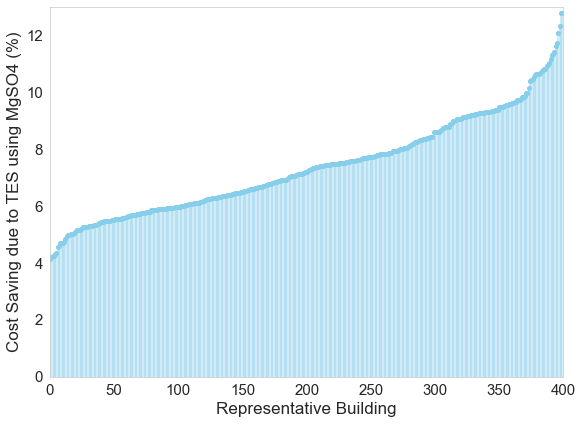

In [22]:
# Graph cost saving due to TES - MgSO4:
fig = plt.subplots(figsize=(9.2,6.8))
#ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - MgSO4')
ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - MgSO4')
#ordered_cost = cost_impacts_TES.sort_values(by='Peak Load')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['cost saving % - MgSO4']*100)
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES using MgSO4 (%)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,13)
plt.xlim(0,400)
#plt.axis([0, 400, 0, 7])
pct_cost_saving_MgSO4
#cost_impacts_TES
diff_all_cost_MgSO4


,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,cost saving % - MgCl2,cost saving - SrBr2,cost saving % - SrBr2,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass
0,287,288,3866.092793,3703.602464,3812.723309,3758.578165,162.490330,0.042030,53.369485,0.013805,107.514628,0.027810,30.477053,63936.968704,0.239483,108.356189,359.535345,163.757399,85.705999
1,399,400,3539.585834,3388.961498,3489.339674,3438.979742,150.624337,0.042554,50.246160,0.014195,100.606093,0.028423,28.411462,57919.433045,0.232716,101.012317,335.167735,152.658695,79.897251
2,385,386,3466.234461,3318.958340,3416.447907,3367.528350,147.276122,0.042489,49.786554,0.014363,98.706111,0.028476,27.341019,56719.004778,0.236815,97.206532,322.539805,146.907057,76.887006
3,133,134,3493.305351,3348.323611,3443.040596,3395.519403,144.981740,0.041503,50.264755,0.014389,97.785948,0.027992,26.428541,57673.600182,0.249115,93.962365,311.775374,142.004187,74.320982
4,4,5,3591.834993,3437.057640,3540.125834,3488.534015,154.777353,0.043091,51.709159,0.014396,103.300977,0.028760,27.902137,59150.390389,0.242000,99.201496,329.159269,149.922022,78.464953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,364,365,424.308559,372.959951,394.365533,384.703081,51.348608,0.121017,29.943025,0.070569,39.605477,0.093341,4.588582,6769.214631,0.168405,16.313954,54.131132,24.655082,12.903774
396,338,339,351.177610,310.297635,325.824742,318.230655,40.879976,0.116408,25.352869,0.072194,32.946956,0.093818,3.346160,5666.573658,0.193317,11.896726,39.474380,17.979378,9.409899
397,210,211,320.706929,281.149693,295.909934,288.483410,39.557236,0.123344,24.796995,0.077320,32.223519,0.100477,3.267824,5129.930228,0.179204,11.618214,38.550254,17.558467,9.189606
398,233,234,302.507901,263.805105,278.543733,271.165198,38.702796,0.127940,23.964168,0.079218,31.342703,0.103610,3.335892,4804.581801,0.164414,11.860219,39.353249,17.924206,9.381024


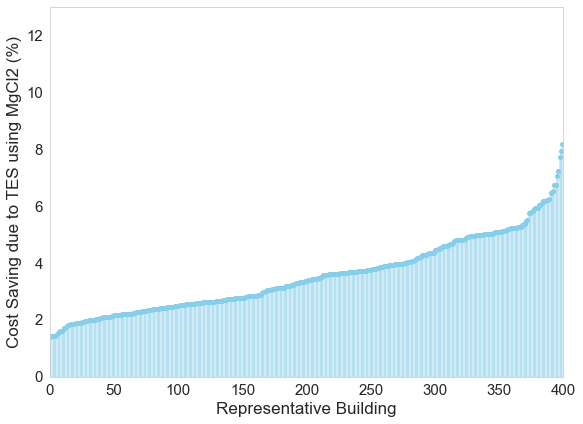

In [24]:
# Graph cost saving due to TES - MgCl2:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - MgCl2')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['cost saving % - MgCl2']*100)
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES using MgCl2 (%)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,13)
plt.xlim(0,400)
#plt.axis([0, 400, 0, 7])
pct_cost_saving_MgCl2
#cost_impacts_TES
diff_all_cost_MgCl2
ordered_cost

,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,...,cost saving % - K2CO3,cost saving - SrBr2,cost saving % - SrBr2,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass
0,175,176,1792.835833,1737.329347,1740.161468,1764.246143,1757.735011,55.506486,0.030960,52.674365,...,0.015947,35.100822,0.019578,12.058029,29626.383489,0.280478,42.870354,142.247596,64.789448,33.908968
1,376,377,1769.110666,1712.868638,1715.544390,1739.883946,1733.385749,56.242028,0.031791,53.566276,...,0.016521,35.724917,0.020194,12.789032,29254.578864,0.261127,45.469317,150.871184,68.717229,35.964658
2,167,168,2325.663548,2243.878233,2255.987035,2287.182474,2273.509248,81.785315,0.035166,69.676513,...,0.016546,52.154300,0.022426,17.684695,38318.809356,0.247349,62.875047,208.624925,95.022299,49.731988
3,109,110,1712.554898,1656.604201,1659.261794,1684.024577,1677.339218,55.950697,0.032671,53.293104,...,0.016660,35.215679,0.020563,12.935849,28143.875088,0.248362,45.991300,152.603171,69.506097,36.377529
4,114,115,1694.907889,1640.266486,1642.811316,1666.557655,1660.201962,54.641404,0.032239,52.096574,...,0.016727,34.705927,0.020477,12.811452,27837.745800,0.248046,45.549026,151.135667,68.837693,36.027705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,52,53,488.987185,464.691636,467.975625,472.612044,473.184550,24.295549,0.049685,21.011560,...,0.033488,15.802634,0.032317,4.928482,7858.448509,0.182020,17.522414,58.140908,26.481413,13.859624
396,389,390,484.299264,460.368042,463.298968,467.918942,468.499661,23.931222,0.049414,21.000296,...,0.033823,15.799604,0.032624,4.788799,7900.389828,0.188329,17.025792,56.493071,25.730873,13.466813
397,164,165,451.329741,427.756553,430.854898,435.445083,436.022527,23.573188,0.052231,20.474844,...,0.035195,15.307215,0.033916,4.939358,7216.226771,0.166777,17.561082,58.269211,26.539851,13.890209
398,99,100,439.207147,416.623227,419.426758,423.704743,424.254882,22.583919,0.051420,19.780389,...,0.035296,14.952265,0.034044,4.456120,7017.284235,0.179766,15.843009,52.568494,23.943348,12.531272


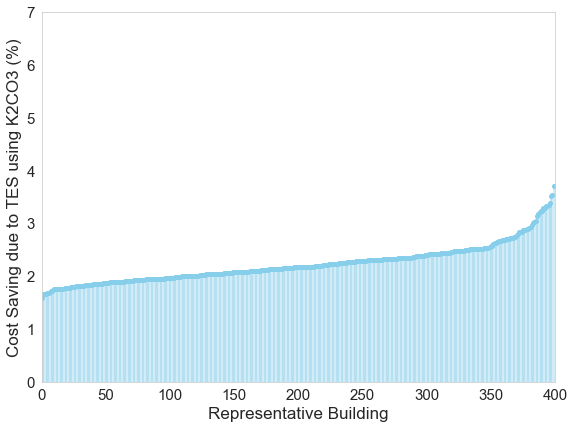

In [12]:
# Graph cost saving due to TES - K2CO3:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - K2CO3')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['cost saving % - K2CO3']*100)
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES using K2CO3 (%)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,7)
plt.xlim(0,400)
#plt.axis([0, 400, 0, 7])
pct_cost_saving_K2CO3
#cost_impacts_TES
diff_all_cost_K2CO3
ordered_cost

,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,cost saving % - MgCl2,cost saving - SrBr2,cost saving % - SrBr2,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass
0,287,288,3866.092793,3703.602464,3812.723309,3758.578165,162.490330,0.042030,53.369485,0.013805,107.514628,0.027810,30.477053,63936.968704,0.239483,108.356189,359.535345,163.757399,85.705999
1,133,134,3493.305351,3348.323611,3443.040596,3395.519403,144.981740,0.041503,50.264755,0.014389,97.785948,0.027992,26.428541,57673.600182,0.249115,93.962365,311.775374,142.004187,74.320982
2,399,400,3539.585834,3388.961498,3489.339674,3438.979742,150.624337,0.042554,50.246160,0.014195,100.606093,0.028423,28.411462,57919.433045,0.232716,101.012317,335.167735,152.658695,79.897251
3,385,386,3466.234461,3318.958340,3416.447907,3367.528350,147.276122,0.042489,49.786554,0.014363,98.706111,0.028476,27.341019,56719.004778,0.236815,97.206532,322.539805,146.907057,76.887006
4,4,5,3591.834993,3437.057640,3540.125834,3488.534015,154.777353,0.043091,51.709159,0.014396,103.300977,0.028760,27.902137,59150.390389,0.242000,99.201496,329.159269,149.922022,78.464953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,364,365,424.308559,372.959951,394.365533,384.703081,51.348608,0.121017,29.943025,0.070569,39.605477,0.093341,4.588582,6769.214631,0.168405,16.313954,54.131132,24.655082,12.903774
396,338,339,351.177610,310.297635,325.824742,318.230655,40.879976,0.116408,25.352869,0.072194,32.946956,0.093818,3.346160,5666.573658,0.193317,11.896726,39.474380,17.979378,9.409899
397,210,211,320.706929,281.149693,295.909934,288.483410,39.557236,0.123344,24.796995,0.077320,32.223519,0.100477,3.267824,5129.930228,0.179204,11.618214,38.550254,17.558467,9.189606
398,233,234,302.507901,263.805105,278.543733,271.165198,38.702796,0.127940,23.964168,0.079218,31.342703,0.103610,3.335892,4804.581801,0.164414,11.860219,39.353249,17.924206,9.381024


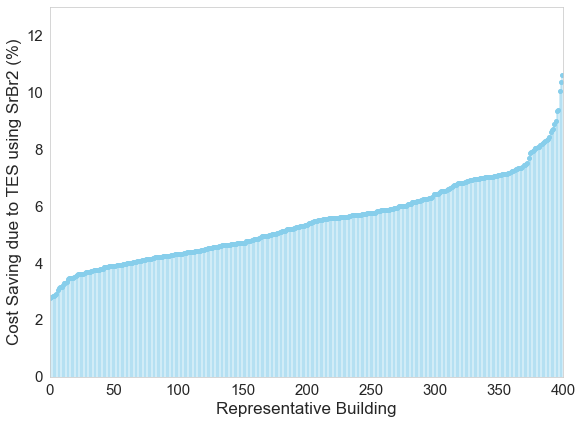

In [25]:
# Graph cost saving due to TES - SrBr2:
fig = plt.subplots(figsize=(9.2,6.8))
#ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - SrBr2')
ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - SrBr2')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['cost saving % - SrBr2']*100)
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES using SrBr2 (%)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,13)
plt.xlim(0,400)
#plt.axis([0, 400, 0, 7])
pct_cost_saving_SrBr2
#cost_impacts_TES
diff_all_cost_SrBr2
ordered_cost

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

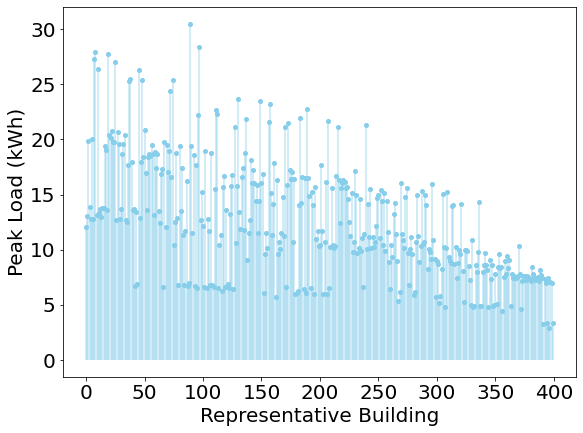

In [6]:
# Graph peak load:
fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['Peak Load'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("Peak Load (kWh)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


,index,building id,TES discharge,load,cost saving,TES fraction of load
0,246,247,4751.886868,49510.006709,0.014096,0.095978
1,68,69,2148.190737,23405.212739,0.014239,0.091783
2,110,111,2247.644924,23817.025735,0.014387,0.094371
3,20,21,2397.666942,24162.564911,0.014513,0.099231
4,206,207,2027.953561,21586.960661,0.014814,0.093943
...,...,...,...,...,...,...
395,364,365,1710.475272,6769.214631,0.041632,0.252684
396,338,339,1714.161878,5666.573658,0.049872,0.302504
397,210,211,1602.807984,5129.930228,0.051984,0.312442
398,233,234,1531.812937,4804.581801,0.054523,0.318823


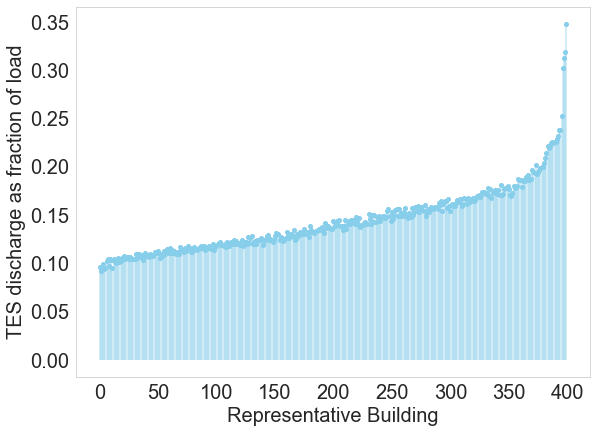

In [60]:
# Total TES discharge to serve load:
tes_discharge = pd.read_excel(ResultsFolder + "TES discharge-"+salt_type+".xlsx")
load = pd.read_excel(ResultsFolder + "load.xlsx")

ordered_tes_discharge = tes_discharge.sort_values(by='building id')
ordered_load = load.sort_values(by='building id')
ordered_tes_discharge = ordered_tes_discharge.reset_index()
ordered_load = ordered_load.reset_index()

# Find TES discharge as fraction of load:
tes_load_combined = pd.DataFrame()
tes_load_combined['building id'] = ordered_load['building id']
tes_load_combined['TES discharge'] = ordered_tes_discharge['TES discharge']
tes_load_combined['load'] = ordered_load['Load']
tes_load_combined['cost saving'] = cost_impacts_TES['cost saving %']
tes_load_combined['TES fraction of load'] = tes_load_combined['TES discharge']/tes_load_combined['load']
ordered_tes_load_combined = tes_load_combined.sort_values(by='cost saving')

# Graph TES as fraction of load
fig, ax = plt.subplots(figsize=(9.2,6.8))
ordered_tes_load_combined = ordered_tes_load_combined.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_tes_load_combined.index, ordered_tes_load_combined['TES fraction of load'])
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.grid(False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("TES discharge as fraction of load", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ordered_tes_load_combined

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

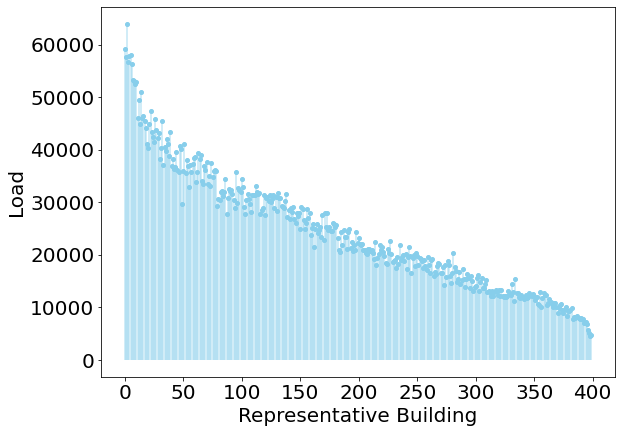

In [5]:
# Graph Load
fig, ax = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_tes_load_combined.index, ordered_tes_load_combined['load'])
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.grid(False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("Load", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [6]:
# HP output:
hp_noTES = pd.read_excel(ResultsFolder + "hp_output - no TES.xlsx")
hp_TES = pd.read_excel(ResultsFolder + "hp_output-"+ salt_type +".xlsx")
hp_noTES = hp_noTES.sort_values(by='building id')
hp_noTES = hp_noTES.reset_index()
hp_TES = hp_TES.sort_values(by='building id')
hp_TES = hp_TES.reset_index()
hp_TES = hp_TES.rename(columns={'HP total': 'HP total - w/TES'})
hp_noTES = hp_noTES.rename(columns={'HP to load': 'HP total - no TES'})
hp_TES['HP total - no TES'] = hp_noTES['HP total - no TES']
hp_TES['cost saving %'] = cost_impacts_TES['cost saving %']
hp_TES['delta HP'] = (hp_TES['HP total - w/TES'] - hp_TES['HP total - no TES'])/hp_TES['HP total - no TES']
hp_TES_sorted = hp_TES.sort_values(by='cost saving %')
hp_TES_sorted = hp_TES_sorted.reset_index()
hp_TES_sorted = hp_TES_sorted.rename(columns={'index': 'building sorted'})
hp_TES_sorted = hp_TES_sorted.reset_index()
hp_TES_sorted

,index,level_0,building sorted,Unnamed: 0,building id,HP to load,HP to TES,HP total - w/TES,HP total - no TES,cost saving %,delta HP
0,0,4,67,0,5,36104.488742,23516.226170,59620.714912,59150.390389,0.065028,0.007951
1,1,133,171,0,134,35358.319104,22770.694977,58129.014081,57673.600182,0.065183,0.007896
2,2,287,106,0,288,38359.507282,26099.450431,64458.957713,63936.968704,0.065204,0.008164
3,3,385,305,0,386,34826.906913,22338.875373,57165.782286,56719.004778,0.065212,0.007877
4,4,399,186,0,400,35182.315767,23201.140080,58383.455847,57919.433045,0.065845,0.008012
...,...,...,...,...,...,...,...,...,...,...,...
395,395,364,388,0,365,2795.407357,4054.905381,6850.312738,6769.214631,0.154385,0.011980
396,396,338,61,0,339,2390.078871,3343.362027,5733.440898,5666.573658,0.156276,0.011800
397,397,210,183,0,211,2149.398145,3041.359269,5190.757414,5129.930228,0.160909,0.011857
398,398,304,108,0,305,1759.819627,2790.543238,4550.362865,4494.552000,0.171062,0.012417


,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass,MgCl2 Salt Mass E,MgCl2 Salt Mass P,MgCl2 Salt Mass,K2CO3 Salt Mass E,K2CO3 Salt Mass P,K2CO3 Salt Mass,SrBr2 Salt Mass E,SrBr2 Salt Mass P,SrBr2 Salt Mass
0,304,0,305,2.931349,5.995942,1.448295,5.995942,15.162151,34.529722,34.529722,15.868958,1.791712,15.868958,9.681521,40.751969,40.751969
1,210,0,211,3.267824,6.684185,1.614537,6.684185,16.902537,38.493211,38.493211,17.690475,1.997373,17.690475,10.792812,45.429678,45.429678
2,233,0,234,3.335892,6.823415,1.648168,6.823415,17.254614,39.295018,39.295018,18.058964,2.038978,18.058964,11.017625,46.375970,46.375970
3,338,0,339,3.346160,6.844418,1.653241,6.844418,17.307724,39.415969,39.415969,18.114550,2.045254,18.114550,11.051537,46.518717,46.518717
4,99,0,100,4.456120,9.114792,2.201641,9.114792,23.048899,52.490707,52.490707,24.123359,2.723689,24.123359,14.717462,61.949520,61.949520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,0,386,27.341019,55.924812,13.508409,55.924812,141.419065,322.062538,322.062538,148.011533,16.711494,148.011533,90.300614,380.098129,380.098129
396,0,0,1,27.724174,56.708539,13.697715,56.708539,143.400902,326.575900,326.575900,150.085756,16.945688,150.085756,91.566081,385.424797,385.424797
397,4,0,5,27.902137,57.072554,13.785641,57.072554,144.321400,328.672208,328.672208,151.049165,17.054463,151.049165,92.153848,387.898860,387.898860
398,399,0,400,28.411462,58.114355,14.037284,58.114355,146.955840,334.671783,334.671783,153.806413,17.365775,153.806413,93.836023,394.979557,394.979557


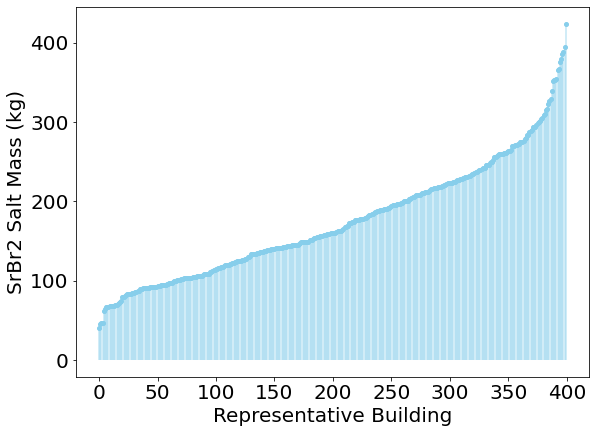

In [15]:
# HP output - no TES:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(hp_TES_sorted['index'], hp_TES_sorted['delta HP'], label = "Change in total HP output due to TES")
#plt.plot(hp_TES_sorted['index'], hp_TES_sorted['HP total - w/TES'], label = "Total HP Output - w/ TES")
plt.legend(loc='upper right')
plt.grid(False)
plt.xlabel("Representative Building",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)